In [1]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [23]:
import random

In [2]:
df = pd.read_csv(r'C:\Users\Yogen\Documents\1. Data Science Courses\2. MIT Data Science Course\Lecture8\temperatures.csv')

In [11]:
df.head()

,CITY,TEMP,DATE
0,SEATTLE,3.10,19610101
1,SEATTLE,0.55,19610102
2,SEATTLE,0.00,19610103
3,SEATTLE,4.45,19610104
4,SEATTLE,8.35,19610105


In [12]:
df[df['DATE'] == 19610101]

,CITY,TEMP,DATE
0,SEATTLE,3.10,19610101
20088,SAN DIEGO,12.25,19610101
40176,PHILADELPHIA,4.20,19610101
60264,PHOENIX,8.60,19610101
80352,LAS VEGAS,3.90,19610101
100440,CHARLOTTE,7.25,19610101
120528,DALLAS,4.15,19610101
140616,BALTIMORE,3.35,19610101
160704,SAN JUAN,24.45,19610101
180792,LOS ANGELES,11.10,19610101


In [8]:
df[df['CITY'] == 'SEATTLE']['TEMP']

0        3.10
1        0.55
2        0.00
3        4.45
4        8.35
         ... 
20083    3.05
20084    3.35
20085    3.90
20086    2.30
20087    1.75
Name: TEMP, Length: 20088, dtype: float64

Text(0.5, 0, 'Temperature')

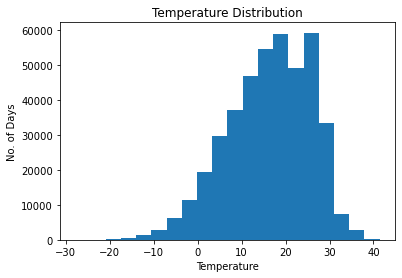

In [16]:
plt.hist(df['TEMP'], bins=20)
plt.title("Temperature Distribution")
plt.ylabel("No. of Days")
plt.xlabel("Temperature")

#### Statistics

In [20]:
standard_deviation = np.std(df['TEMP'])
standard_deviation

9.4375585448045

In [54]:
mean = np.mean(df['TEMP'])
mean

16.298769461986048

In [26]:
sample_100 = random.sample(list(df['TEMP']), 100)

(array([ 2.,  0.,  2., 13., 10., 18., 15., 13., 10., 17.]),
 array([-9.75 , -5.775, -1.8  ,  2.175,  6.15 , 10.125, 14.1  , 18.075,
        22.05 , 26.025, 30.   ]),
 <a list of 10 Patch objects>)

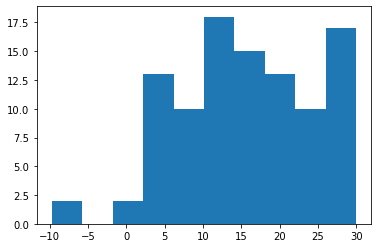

In [27]:
plt.hist(sample_100)

In [31]:
mean_sample_100 = np.mean(sample_100)
standard_dev_sample_100 = np.std(sample_100)

In [30]:
mean_sample_100

15.5485

In [29]:
standard_dev_sample_100

8.895961035773482

##### Distribution of Means

In [33]:
means = []
for i in range(1000):
    sample = random.sample(list(df['TEMP']), 100)
    sample_mean = np.mean(sample)
    
    means.append(sample_mean)

(array([ 1.,  0.,  1.,  3.,  7.,  5., 24., 25., 37., 48., 61., 80., 76.,
        94., 89., 90., 81., 62., 67., 43., 50., 23., 13., 11.,  6.,  0.,
         1.,  1.,  0.,  1.]),
 array([13.0955    , 13.32051667, 13.54553333, 13.77055   , 13.99556667,
        14.22058333, 14.4456    , 14.67061667, 14.89563333, 15.12065   ,
        15.34566667, 15.57068333, 15.7957    , 16.02071667, 16.24573333,
        16.47075   , 16.69576667, 16.92078333, 17.1458    , 17.37081667,
        17.59583333, 17.82085   , 18.04586667, 18.27088333, 18.4959    ,
        18.72091667, 18.94593333, 19.17095   , 19.39596667, 19.62098333,
        19.846     ]),
 <a list of 30 Patch objects>)

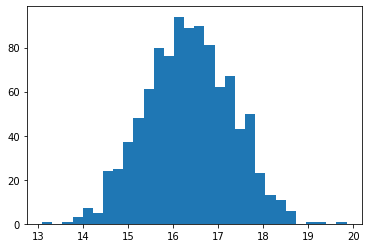

In [41]:
plt.hist(means, bins = 30)

In [43]:
mean_of_means = np.mean(means)
mean_of_means

16.348011999999997

In [45]:
standard_dev_means = np.std(means)
standard_dev_means

0.9541396057999059

### Plotting variances for different sample sizes

In [198]:
n_values = [100, 200, 300, 400, 500, 600]
means_for_different_n = []
std_for_different_n = []
for n in n_values:
    distribution_means  = []
    for i in range(100):
        sample = random.sample(list(df['TEMP']), n)
        sample_mean = np.mean(sample)
        distribution_means.append(sample_mean)
    means_n = np.mean(distribution_means)
    std_n = np.std(distribution_means)
    means_for_different_n.append(means_n)
    std_for_different_n.append(std_n)

    

In [199]:
std_for_different_n

[0.8952444292482359,
 0.6244663165205551,
 0.556948456569367,
 0.4795259933322174,
 0.44839140655793147,
 0.3443134639909057]

<ErrorbarContainer object of 3 artists>

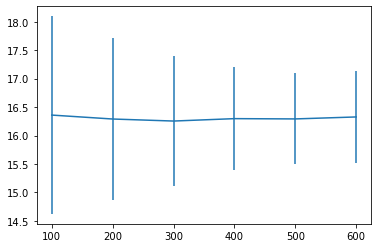

In [100]:
plt.errorbar(n_values, means_for_different_n, yerr=1.96*np.array(std_for_different_n))

We've calculated the standard errors of the distributions of means above. Let's plot it with the sigma/root n  value

In [192]:
def standard_error(standard_dev, n):
    return standard_dev/n**(0.5)

In [194]:
sigma_upon_root_n_values = []
for n in n_values:
    sigma_upon_root_n = standard_error(standard_deviation, n)
    sigma_upon_root_n_values.append(sigma_upon_root_n)

In [196]:
sigma_upon_root_n_values

[0.94375585448045,
 0.6673361644876307,
 0.544877696633573,
 0.471877927240225,
 0.4220604489563371,
 0.38528671420690597]

In [200]:
std_for_different_n

[0.8952444292482359,
 0.6244663165205551,
 0.556948456569367,
 0.4795259933322174,
 0.44839140655793147,
 0.3443134639909057]

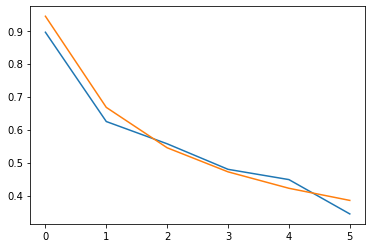

In [201]:
plt.plot(std_for_different_n)
plt.plot(sigma_upon_root_n_values)

#### Plotting different distributions

we will plot different distributions and then see the percentage error of the sample variance with the actual variance with sample size

In [207]:
def plot_distributions():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0,1))
        exp.append(random.expovariate(0.5))
    return (uniform, normal, exp)

In [209]:
uniform, normal, exp = plot_distributions()

(array([ 951., 1001.,  984., 1020.,  950., 1003.,  965.,  996., 1007.,
        1033.,  954., 1005., 1036.,  966.,  995.,  979., 1035., 1009.,
        1002., 1019., 1078., 1028.,  963., 1014., 1022., 1069., 1005.,
        1031., 1072.,  959., 1021.,  945., 1012., 1014.,  987., 1019.,
        1002.,  993.,  992.,  965.,  970., 1008.,  940.,  992.,  992.,
         983.,  998.,  948., 1061., 1042.,  964.,  956., 1019.,  967.,
        1023.,  995.,  996.,  966., 1034., 1031.,  960., 1014., 1008.,
         968., 1051., 1015., 1015., 1015., 1061.,  993.,  980.,  971.,
         979.,  978.,  970., 1000.,  992., 1012.,  988.,  995.,  999.,
         985., 1044., 1015.,  959., 1018.,  973., 1031., 1025., 1022.,
         961.,  982., 1033.,  981.,  970., 1006.,  986., 1021., 1020.,
        1018.]),
 array([4.27092888e-06, 1.00041402e-02, 2.00040094e-02, 3.00038786e-02,
        4.00037478e-02, 5.00036171e-02, 6.00034863e-02, 7.00033555e-02,
        8.00032248e-02, 9.00030940e-02, 1.00002963e-01, 1.

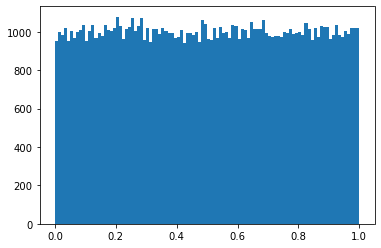

In [212]:
plt.hist(uniform, bins = 100)

(array([1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 8.000e+00, 5.000e+00,
        1.500e+01, 8.000e+00, 1.400e+01, 3.700e+01, 3.500e+01, 4.200e+01,
        5.200e+01, 6.600e+01, 9.900e+01, 1.260e+02, 1.240e+02, 1.640e+02,
        2.130e+02, 2.610e+02, 3.020e+02, 3.960e+02, 4.330e+02, 5.670e+02,
        6.810e+02, 7.370e+02, 8.720e+02, 9.680e+02, 1.113e+03, 1.285e+03,
        1.463e+03, 1.612e+03, 1.771e+03, 1.854e+03, 2.031e+03, 2.345e+03,
        2.402e+03, 2.572e+03, 2.772e+03, 2.846e+03, 2.993e+03, 3.066e+03,
        3.039e+03, 3.368e+03, 3.357e+03, 3.411e+03, 3.377e+03, 3.372e+03,
        3.336e+03, 3.194e+03, 3.127e+03, 2.997e+03, 2.960e+03, 2.813e+03,
        2.643e+03, 2.514e+03, 2.368e+03, 2.088e+03, 1.949e+03, 1.833e+03,
        1.594e+03, 1.415e+03, 1.259e+03, 1.186e+03, 1.004e+03, 8.560e+02,
        7.450e+02, 6.800e+02, 5.280e+02, 4.500e+02, 4.260e+02, 3.130e+02,
        3.030e+02, 2.390e+02, 1.850e+0

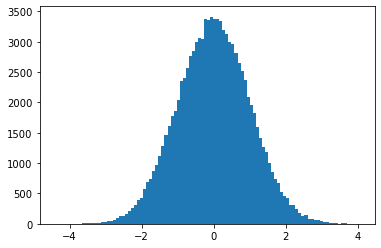

In [214]:
plt.hist(normal, bins = 100)

(array([3.685e+03, 3.555e+03, 3.348e+03, 3.277e+03, 3.180e+03, 3.041e+03,
        2.901e+03, 2.825e+03, 2.789e+03, 2.632e+03, 2.546e+03, 2.368e+03,
        2.357e+03, 2.221e+03, 2.241e+03, 2.116e+03, 2.060e+03, 2.011e+03,
        1.838e+03, 1.803e+03, 1.709e+03, 1.656e+03, 1.616e+03, 1.629e+03,
        1.502e+03, 1.420e+03, 1.328e+03, 1.338e+03, 1.281e+03, 1.198e+03,
        1.206e+03, 1.170e+03, 1.082e+03, 1.068e+03, 9.930e+02, 9.820e+02,
        9.850e+02, 8.390e+02, 9.090e+02, 8.310e+02, 8.030e+02, 7.710e+02,
        7.870e+02, 7.460e+02, 6.870e+02, 6.040e+02, 6.720e+02, 6.660e+02,
        6.620e+02, 5.830e+02, 5.370e+02, 5.530e+02, 5.240e+02, 5.070e+02,
        4.600e+02, 4.790e+02, 4.660e+02, 4.480e+02, 3.900e+02, 3.830e+02,
        3.920e+02, 3.520e+02, 3.520e+02, 3.500e+02, 3.380e+02, 2.900e+02,
        3.320e+02, 3.180e+02, 2.860e+02, 2.920e+02, 2.980e+02, 2.380e+02,
        2.450e+02, 2.250e+02, 2.340e+02, 2.380e+02, 1.990e+02, 2.210e+02,
        1.980e+02, 1.960e+02, 1.650e+0

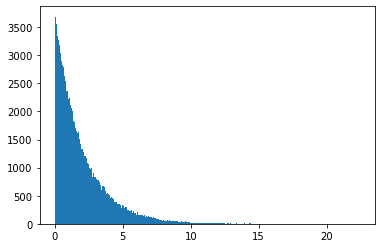

In [216]:
plt.hist(exp, bins=300)

In [218]:
std_uniform = np.std(uniform)
std_normal = np.std(normal)
std_exp = np.std(exp)

we have the standard deviations of three different kinds of populations. we wanna see how error of the standard deviation of samples with the actual standard deviation varies with the sample size.

In [225]:
def std_error_vs_n(distribution, std_distribution):
    std_samples_error_of_distribution = []
    for n in range(1,600,3):
        sample = random.sample(distribution, n)
        std_sample = np.std(sample)
        
        #error
        std_error_sample = abs((std_distribution-std_sample)/std_distribution*100)
        std_samples_error_of_distribution.append(std_error_sample)
    return std_samples_error_of_distribution

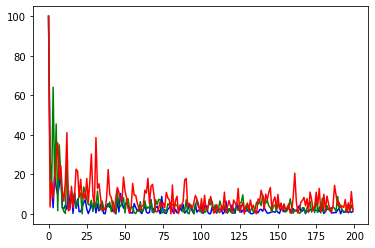

In [233]:
plt.plot(std_error_vs_n(uniform, std_uniform), 'b')
plt.plot(std_error_vs_n(normal, std_normal), 'g')
plt.plot(std_error_vs_n(exp, std_exp), 'r')

The exponential distribution errors are in red and are the highest because it is the most skewed

## The more skewed the population is, the larger the sample size you'll need for a good approximation